In [1]:
from appyter import magic
magic.init(lambda _= globals: _())

In [22]:
import gzip
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from IPython.display import FileLink

In [3]:
%%appyter code_eval
{% do DescriptionField(
    name = 'DataSet',
    text = 'Input your Data Below or use the example data to test the function of this Appyter ',
    section = 'data'
)%}

{% set TestDat = FileField(
    constraint= '.*.txt',
    name= 'TestDat',
    label = 'Test Data (.txt)',
    default = 'ToostingData.txt',
    examples = {
       'ToostingData.txt' : 'https://github.com/FlarPet/Bioinformatics-final-Part3/blob/main/ToostingData.txt'
    },
    section= 'data'
)
%}

TestDat = {{TestDat}}


```python

TestDat = 'ToostingData.txt'
```

In [66]:
TestDat = pd.read_excel('C:/Users/Francisco Velasquez/Documents/Grad Work/Programming in Bioinfo/Final part 3/ToostingData.xlsx')

In [65]:
%%appyter markdown
{%
    set text0 = TextField(name = 'Quick Check', label = 'Markdown', default = 'Lets make sure there arent any NAs in the data. Dark Stripes in the following heatmap indicate NAs within the data.')
 %}
{{text0}}


'''Lets make sure there arent any NAs in the data. Dark Stripes in the following heatmap indicate NAs within the data.'''

<Axes: >

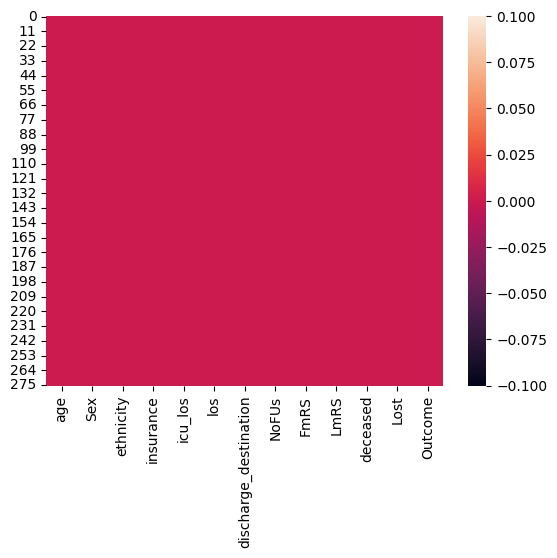

In [6]:
sns.heatmap(TestDat.isnull())

In [7]:
%%appyter markdown
{%
    set text1 = TextField(name = 'HeatExplain', label = 'Markdown', default = 'Having NAs in the Data doesnt prevent further analysis, but you shouldnt include those variables in the model')
 %}
{{text1}}


'''Having NAs in the Data doesnt prevent further analysis, but you shouldnt include those variables in the model'''

In [64]:
cols = list(TestDat.columns)
print('Here is all the variables within your data set:', ', '.join(cols))

Here is all the variables within your data set: age, Sex, ethnicity, insurance, icu_los, los, discharge_destination, NoFUs, FmRS, LmRS, deceased, Lost, Outcome


In [57]:
%%appyter code_eval
{% do DescriptionField(
    name = 'DataSet',
    text = 'Input your Data Below or use the example data to test the function of this Appyter ',
    section = 'data'
)%}

{% set Variables = TextField(
    name='variables',
    label='Variables',
    description='Type which variables you would like to include in the model, without spaces and with a comma in between ',
    default='age,Sex,NoFUs,LmRS',
    section='Variables',
    rows=1
) %}

{% set Outcome = TextField(
    name='outcome',
    label='Outcome',
    description='Type which variable you would like to designate as the dependent variable within the model',
    default='Outcome',
    section='Variables',
    rows=1
) %}

reef = {{Variables}}
reef = reef.split(',')
out = {{Outcome}}
VarCheck = all(item in cols for item in reef)
OutCheck = any(item in out for item in cols)
if VarCheck is False:
    sys.exit("Variables not seen within the data set, please restart and input variables within your data set.")
elif OutCheck is False:
    sys.exit('Your dependent variable is not within the data set, please researt and choose a variable present in your data set.')
else:
    X = TestDat[reef]
    Y = TestDat[out]

print('you have chosen to use the variables', ', '.join(reef), 'as your independent variables and', out, ' as your dependent variable for the model')

```python
reef = '''age,Sex,NoFUs,LmRS'''
reef = reef.split(',')
out = '''Outcome'''
VarCheck = all(item in cols for item in reef)
OutCheck = any(item in out for item in cols)
if VarCheck is False:
    sys.exit("Variables not seen within the data set, please restart and input variables within your data set.")
elif OutCheck is False:
    sys.exit('Your dependent variable is not within the data set, please researt and choose a variable present in your data set.')
else:
    X = TestDat[reef]
    Y = TestDat[out]
print('you have chosen to use the variables', ', '.join(reef), 'as your independent variables and', out, ' as your dependent variable for the model')
```

you have chosen to use the variables age, Sex, NoFUs, LmRS as your independent variables and Outcome  as your dependent variable for the model


None

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=16)


In [61]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter = 300)
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)


Text(0.5, 23.52222222222222, 'Predicted label')

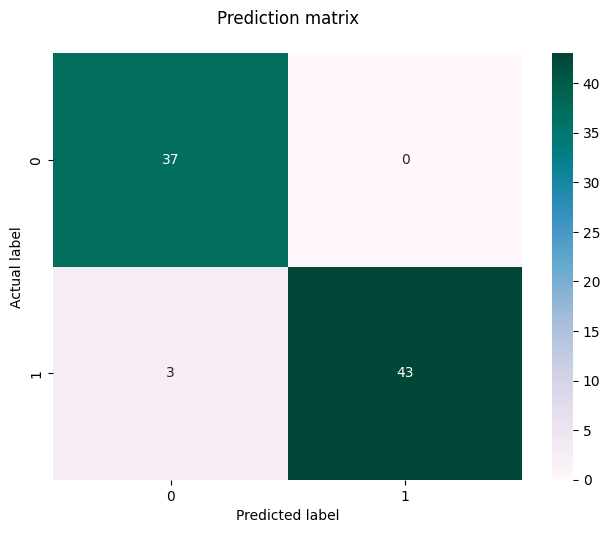

In [71]:
from sklearn import metrics

conmat = metrics.confusion_matrix(Y_test, Y_pred)
conmat

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conmat), annot=True, cmap="PuBuGn" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Prediction matrix', y=1.05)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [74]:
from sklearn.metrics import classification_report
target_names = ['Good outcome', 'Bad Outcome']
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

Good outcome       0.93      1.00      0.96        37
 Bad Outcome       1.00      0.93      0.97        46

    accuracy                           0.96        83
   macro avg       0.96      0.97      0.96        83
weighted avg       0.97      0.96      0.96        83



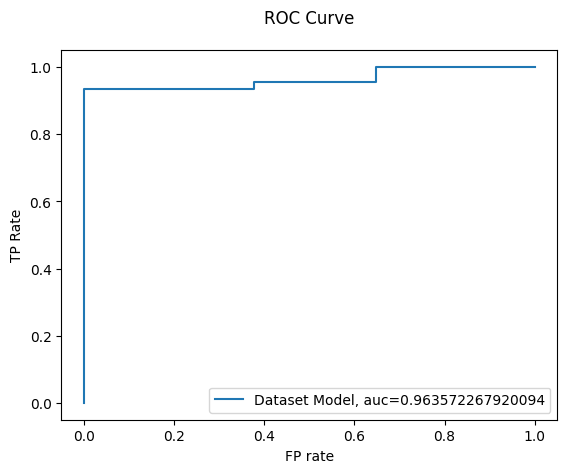

In [72]:
Y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="Dataset Model, auc="+str(auc))
plt.title('ROC Curve', y=1.05)
plt.ylabel('TP Rate')
plt.xlabel('FP rate')
plt.legend(loc=4)
plt.show()